<a href="https://colab.research.google.com/github/willianszwy/PP2.2.2-Proposicao-e-Avaliacao-de-RNAs/blob/main/PP2_2_2_Proposic%CC%A7a%CC%83o_e_Avaliac%CC%A7a%CC%83o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes*  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes* o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

---
⚠ **Nota:** Foi acordado com a professora Elloá B. Guedes (criadora do projeto em questão), que o número de vezes ficará reduzido para 15 vezes, devida a limitação de hardware dos alunos e pelo longo tempo de treinamento. Entretanto, fica a seu critério utilizar a quantidade de vezes que é recomendado pelo enunciado.

Diante disso, sempre será necessário inserir um valor antes de rodar as questões que pedirem uma quantidade de vezes!

`😉 Caso você tenha um computador potente, daqueles que tem Led RGB, denominado GAMER, execute de acordo com o enunciado e nos mostre os resultados depois!!!!`
`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz

--2021-11-29 01:04:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-httpd-php]
Saving to: ‘covtype.data.gz’

covtype.data.gz     100%[===================>]  10.72M  19.5MB/s    in 0.5s    

2021-11-29 01:04:59 (19.5 MB/s) - ‘covtype.data.gz’ saved [11240707/11240707]



1) Abra a base de dados em questão

In [ ]:
!gunzip covtype.data.gz

In [ ]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
df_forest_cover = pd.read_csv("covtype.data", names = columns)

2) Elimine todas as colunas relativas aos atributos categóricos

In [ ]:
df_forest_cover.drop(columns=['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],inplace=True)

In [ ]:
df_forest_cover.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')

In [ ]:
df_forest_cover.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


3) Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X

In [ ]:
y = df_forest_cover['Cover_Type']
X = df_forest_cover.drop('Cover_Type', axis=1)


4) Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

5) Efetue o escalonamento dos atributos

In [ ]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

In [ ]:
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [ ]:
X_test_std.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
376969,-0.037426,-0.488988,0.920164,1.992831,1.790238,0.423554,1.413012,-0.877245,-1.789360,-1.046576
59897,0.852203,0.002529,-0.547926,1.131772,-0.402780,0.995622,0.740936,0.894092,-0.066030,1.689429
247100,-2.717032,-1.373720,0.519776,0.251893,0.539532,-1.161671,-0.715228,-0.978464,0.116747,-1.382351
111532,-0.387561,-0.399622,-0.014075,-0.562113,-0.334248,0.028692,1.151649,0.033728,-0.927695,0.232389
522294,-0.141038,-0.971569,0.920164,0.308356,1.241984,-0.036797,0.367561,-1.737608,-1.319361,0.058088


5) Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios

In [ ]:
clf = MLPClassifier(activation='relu',solver='adam', verbose=True, hidden_layer_sizes=(10,), max_iter=300,alpha=1e-05,random_state=1)

In [ ]:
clf.fit(X_train_std, y_train)

Iteration 1, loss = 0.92717562
Iteration 2, loss = 0.70777019
Iteration 3, loss = 0.68934153
Iteration 4, loss = 0.68092758
Iteration 5, loss = 0.67471941
Iteration 6, loss = 0.67039080
Iteration 7, loss = 0.66792286
Iteration 8, loss = 0.66639328
Iteration 9, loss = 0.66522587
Iteration 10, loss = 0.66413426
Iteration 11, loss = 0.66324763
Iteration 12, loss = 0.66245579
Iteration 13, loss = 0.66166308
Iteration 14, loss = 0.66092262
Iteration 15, loss = 0.66018618
Iteration 16, loss = 0.65960065
Iteration 17, loss = 0.65908104
Iteration 18, loss = 0.65866413
Iteration 19, loss = 0.65820954
Iteration 20, loss = 0.65792874
Iteration 21, loss = 0.65765337
Iteration 22, loss = 0.65740349
Iteration 23, loss = 0.65710202
Iteration 24, loss = 0.65692173
Iteration 25, loss = 0.65662437
Iteration 26, loss = 0.65656499
Iteration 27, loss = 0.65639138
Iteration 28, loss = 0.65618240
Iteration 29, loss = 0.65614504
Iteration 30, loss = 0.65602744
Iteration 31, loss = 0.65592779
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), max_iter=300,
              random_state=1, verbose=True)

In [ ]:
y_pred =clf.predict(X_test_std)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


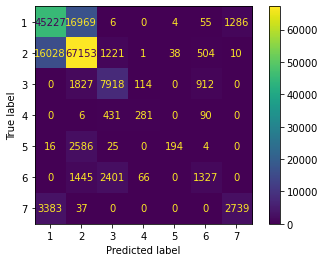

In [ ]:
fig = plot_confusion_matrix(clf, X_test_std, y_test, display_labels=clf.classes_)

In [ ]:
print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.7162


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.71      0.71     63547
           2       0.75      0.79      0.77     84955
           3       0.66      0.74      0.70     10771
           4       0.61      0.35      0.44       808
           5       0.82      0.07      0.13      2825
           6       0.46      0.25      0.33      5239
           7       0.68      0.44      0.54      6159

    accuracy                           0.72    174304
   macro avg       0.67      0.48      0.51    174304
weighted avg       0.71      0.72      0.71    174304



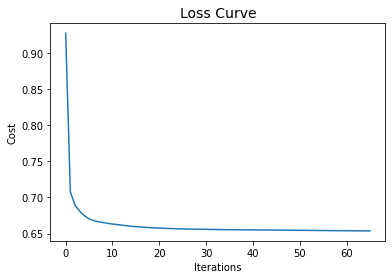

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

7) Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes*.  
7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout 

In [ ]:
def choose_amount():
  amount = int(input("O recomendado é 15, mas pode ser entre (2, 100): "))
  while amount <= 1 or amount > 100:
    amount = int(input("O recomendado é 15, mas pode ser entre (2, 100): "))

  print("Quantidade de vezes escolhido: ", amount)

  return amount

In [ ]:
amount = choose_amount()
accuracys = []
fscores = []

for _ in range(amount):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  clf1 = MLPClassifier(activation='relu',solver='adam', verbose=False, hidden_layer_sizes=(10,), max_iter=300,alpha=1e-05,random_state=1)
  clf1.fit(X_train_std, y_train)

  y_pred =clf1.predict(X_train_std)

  accuracys.append(accuracy_score(y_train, y_pred))
  fscores.append(f1_score(y_train, y_pred, average=None))

7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino 

In [ ]:
print("------Acurácia------\n Média: {0:.4f} \n Desvio padrão: {1:.4f}".format(np.mean(accuracys), np.std(accuracys)))
print("------F Score------\n Média: {0:.4f} \n Desvio padrão: {1:.4f}".format(np.mean(fscores), np.std(fscores)))

8) Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD

In [ ]:
clf2 = MLPClassifier(activation='relu',solver='sgd', verbose=False, hidden_layer_sizes=(10,), max_iter=100,alpha=1e-05,random_state=1)

In [ ]:
clf2.fit(X_train_std, y_train)

8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino

In [ ]:
y_pred2 =clf2.predict(X_test_std)

print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred2)))

In [ ]:
print(classification_report(y_test, y_pred2))

9) Houve influência da escolha do otimizador no desempenho da rede?

Resp. 9: Levando em consideração que o otimizador *"SGD"* leva mais épocas para convergir do que o otimizador *"Adam"*, pode-se concluir que sim, a escolha do otimizador foi influenciada pelo desempenho de ambos.

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?